These are the following libraries to be used throughout this project.

In [81]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In order to use the Foursquare API, the following information must be registered into the notebook.

In [82]:
CLIENT_ID = 'J1G3N5QJ5KDRHMVD5BM0NYGYEQZZ3BAJI4E4XCDJIWUTWQRS'
CLIENT_SECRET = 'NR2AND3TQYOKVUZDIDVMMGAHIL52GZPV0NQKFDOCLWMNH3BN'
VERSION = '20180604'
LIMIT = 500
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: J1G3N5QJ5KDRHMVD5BM0NYGYEQZZ3BAJI4E4XCDJIWUTWQRS
CLIENT_SECRET:NR2AND3TQYOKVUZDIDVMMGAHIL52GZPV0NQKFDOCLWMNH3BN


The next few blocks of code are the data cleaning and scraping of the Times Square hotel database.

In [83]:
hotels = pd.read_csv("datasets_31327_356338_times-square-hotels.csv") #Turns the csv file into a pandas dataframe

In [84]:
hotel_data = hotels[['Company Name', 'Latitude', 'Longitude']] #Many features are unnecessary, so we only use the name, latitude and longitude

In [85]:
hotel_data.drop([1, 3, 5, 6, 8, 15, 19, 24, 26, 27, 35, 38],0,inplace=True)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [86]:
hotel_data.rename(columns = {'Company Name': 'Hotel'}, inplace = True)
hotel_data

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Hotel,Latitude,Longitude
0,Paramount Hotel,40.759132,-73.986348
2,Millennium Hotel,40.756667,-73.984396
4,Novotel,40.762897,-73.983683
7,Doubletree Guest Suites,40.759055,-73.984710
9,Hotel 41 At Times Square,40.755597,-73.987999
10,"Time Hotel, The",40.761014,-73.985052
11,Hilton Times Square,40.756747,-73.988659
12,The Westin New York at Times Square,40.757482,-73.988309
13,Crowne Plaza Times Square,40.760537,-73.984644
14,Renaissance Times Square,40.759581,-73.984366


The cost was gathered from Tripadvisor, and was determined by which service offered the hotel for the cheapest price. 

In [87]:
cost = [104, 127, 168, 93, 340, 316, 157, 249, 359, 277, 328, 299, 148, 104, 234, 181, 235, 423, 81, 229, 109, 150, 92, 301, 155, 198, 179, 120, 182]

In [88]:
hotel_data['Cost'] = cost

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [89]:
hotel_data

,Hotel,Latitude,Longitude,Cost
0,Paramount Hotel,40.759132,-73.986348,104
2,Millennium Hotel,40.756667,-73.984396,127
4,Novotel,40.762897,-73.983683,168
7,Doubletree Guest Suites,40.759055,-73.984710,93
9,Hotel 41 At Times Square,40.755597,-73.987999,340
10,"Time Hotel, The",40.761014,-73.985052,316
11,Hilton Times Square,40.756747,-73.988659,157
12,The Westin New York at Times Square,40.757482,-73.988309,249
13,Crowne Plaza Times Square,40.760537,-73.984644,359
14,Renaissance Times Square,40.759581,-73.984366,277


In [90]:
hotel_data.shape

(29, 4)

As we can see from the resulting dataframe, a total of 29 hotels remain after having removed 12 hotels where the cost could not be found, or a matching hotel could not be found on Tripadvisor.

In [91]:
import statistics
print('The average cost for hotels in Times Square comes down to', round(statistics.mean(cost), 2), 'USD per night.')
print('Meanwhile, the median price for these hotels is', statistics.median(cost), 'USD per night.')

The average cost for hotels in Times Square comes down to 204.76 USD per night.
Meanwhile, the median price for these hotels is 181 USD per night.


TypeError: 'DataFrame' object is not callable

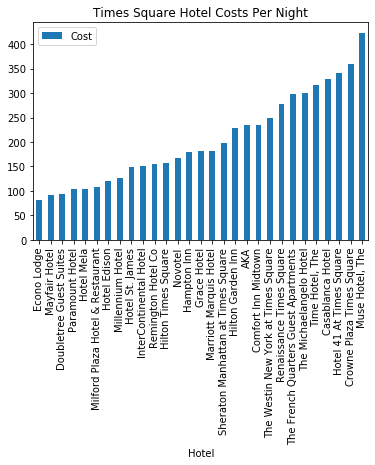

In [92]:
import matplotlib.pyplot as plt
hotel_data_c = hotel_data.sort_values('Cost')
hotel_data_c.plot.bar(x = 'Hotel', y = 'Cost', width = 0.5, title = "Times Square Hotel Costs Per Night")
hotel_data_c(block = True)

It is important to note that the cheapest hotel to stay at is The Econo Lodge, at 81 USD a night and the most expensive was The Muse Hotel at a whopping 423 USD a night.

Now, a folium map of these hotels will be made as a baseline for the next step in the process, which will be to create a folium map of the venues in Times Square, and the hotel locations.

In [93]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[40.7580, -73.9855], zoom_start=15)
# add markers to map
for hotel, latitude, longitude, cost in zip(hotel_data['Hotel'], hotel_data['Latitude'], hotel_data['Longitude'], hotel_data['Cost']):
    label = '{}, ${}/night'.format(hotel, cost)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [latitude, longitude],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

The next step is to add all the venues to explore in Times Square using the Foursquare API. 

In [94]:
latitude = 40.7580
longitude = -73.9855

In [95]:
radius = 500
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?client_id=J1G3N5QJ5KDRHMVD5BM0NYGYEQZZ3BAJI4E4XCDJIWUTWQRS&client_secret=NR2AND3TQYOKVUZDIDVMMGAHIL52GZPV0NQKFDOCLWMNH3BN&ll=40.758,-73.9855&v=20180604&radius=500&limit=500'

In [96]:
import requests

In [97]:
results = requests.get(url).json()
results['response']['groups'][0]['items']

[{'reasons': {'count': 0,
   'items': [{'summary': 'This spot is popular',
     'type': 'general',
     'reasonName': 'globalInteractionReason'}]},
  'venue': {'id': '59580ce6db1d8148fee3d383',
   'name': 'Los Tacos No. 1',
   'location': {'address': '229 W 43rd St',
    'crossStreet': 'btwn 7th & 8th Ave',
    'lat': 40.757237,
    'lng': -73.987454,
    'labeledLatLngs': [{'label': 'display',
      'lat': 40.757237,
      'lng': -73.987454}],
    'distance': 185,
    'postalCode': '10036',
    'cc': 'US',
    'neighborhood': 'Theater District',
    'city': 'New York',
    'state': 'NY',
    'country': 'United States',
    'formattedAddress': ['229 W 43rd St (btwn 7th & 8th Ave)',
     'New York, NY 10036',
     'United States']},
   'categories': [{'id': '4bf58dd8d48988d151941735',
     'name': 'Taco Place',
     'pluralName': 'Taco Places',
     'shortName': 'Tacos',
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/taco_',
      'suffix': '.png'},
     'primary':

In [98]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [99]:
dataframe = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories'] + [col for col in dataframe.columns if col.startswith('venue.location.')] + ['venue.id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# filter the category for each row
dataframe_filtered['venue.categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean columns
dataframe_filtered.columns = [col.split('.')[-1] for col in dataframe_filtered.columns]

dataframe_filtered = dataframe_filtered[dataframe_filtered.categories != "Hotel"]
venue_df = dataframe_filtered[['name', 'categories', 'lat', 'lng']]
venue_df

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """Entry point for launching an IPython kernel.


,name,categories,lat,lng
0,Los Tacos No. 1,Taco Place,40.757237,-73.987454
1,Minskoff Theatre,Theater,40.757389,-73.985537
2,Aladdin @ New Amsterdam Theatre,Theater,40.757052,-73.987488
3,Hudson Theatre,Theater,40.756908,-73.984503
4,Gulliver's Gate,Exhibit,40.757866,-73.986909
5,Lunt-Fontanne Theatre,Theater,40.759072,-73.985862
6,Lion King Broadway Musical,Concert Hall,40.757481,-73.985623
7,Margon,Cuban Restaurant,40.757944,-73.983797
8,Hamilton: An American Musical,Performing Arts Venue,40.759107,-73.986697
9,Richard Rodgers Theatre,Theater,40.759147,-73.986697


Because the API pulls up some venues that are classified as hotels, any venue that is listed as a hotel is dropped from the dataframe.

In [100]:
for name, lat, lng, categories in zip(venue_df.name, venue_df.lat, venue_df.lng, venue_df.categories):
    label = '{}: {}'.format(name, categories)
    label = folium.Popup(label, parse_html=True)
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='red',
        popup=label,
        fill = True,
        fill_color='red',
        fill_opacity=0.6
    ).add_to(map_newyork)

# display map
map_newyork

The above map shows the hotel locations in blue and the venue locations in red. 

The venues are all clustered within the hotel cluster. Due to this, hotels further away from this venue clusters (i.e. Novotel, Sheraton Manhattan, Hampton Inn) will likely not be the best place for tourists.

The next step is to calculate the distance between each hotel and each venue.

In [101]:
from geopy.distance import distance

In [102]:
hotel_data_L = hotel_data[['Latitude', 'Longitude']]
hotel_data_L

,Latitude,Longitude
0,40.759132,-73.986348
2,40.756667,-73.984396
4,40.762897,-73.983683
7,40.759055,-73.984710
9,40.755597,-73.987999
10,40.761014,-73.985052
11,40.756747,-73.988659
12,40.757482,-73.988309
13,40.760537,-73.984644
14,40.759581,-73.984366


In [103]:
df_L = venue_df[['lat', 'lng']]
df_L

,lat,lng
0,40.757237,-73.987454
1,40.757389,-73.985537
2,40.757052,-73.987488
3,40.756908,-73.984503
4,40.757866,-73.986909
5,40.759072,-73.985862
6,40.757481,-73.985623
7,40.757944,-73.983797
8,40.759107,-73.986697
9,40.759147,-73.986697


In [104]:
subset1 = hotel_data_L[['Latitude', 'Longitude']]
tuples1 = [tuple(x) for x in subset1.to_numpy()]

subset2 = df_L[['lat', 'lng']]
tuples2 = [tuple(y) for y in subset2.to_numpy()]

tuples_1 = np.array(tuples1)
tuples_1

array([[ 40.759132, -73.986348],
       [ 40.756667, -73.984396],
       [ 40.762897, -73.983683],
       [ 40.759055, -73.98471 ],
       [ 40.755597, -73.987999],
       [ 40.761014, -73.985052],
       [ 40.756747, -73.988659],
       [ 40.757482, -73.988309],
       [ 40.760537, -73.984644],
       [ 40.759581, -73.984366],
       [ 40.756022, -73.984808],
       [ 40.760359, -73.989286],
       [ 40.757026, -73.983291],
       [ 40.756461, -73.983952],
       [ 40.756491, -73.983977],
       [ 40.757163, -73.983613],
       [ 40.757811, -73.98323 ],
       [ 40.757814, -73.98328 ],
       [ 40.760315, -73.987554],
       [ 40.761127, -73.98694 ],
       [ 40.758663, -73.988738],
       [ 40.758706, -73.989276],
       [ 40.761138, -73.985344],
       [ 40.761439, -73.982168],
       [ 40.757811, -73.98323 ],
       [ 40.762005, -73.982612],
       [ 40.763059, -73.985557],
       [ 40.759727, -73.985886],
       [ 40.758267, -73.985468]])

In [105]:
tuples_2 = np.array(tuples2)
tuples_2

array([[ 40.757237  , -73.987454  ],
       [ 40.75738906, -73.98553702],
       [ 40.75705213, -73.98748802],
       [ 40.756908  , -73.984503  ],
       [ 40.75786571, -73.98690851],
       [ 40.75907197, -73.98586182],
       [ 40.75748093, -73.98562261],
       [ 40.757944  , -73.983797  ],
       [ 40.75910671, -73.9866972 ],
       [ 40.75914735, -73.9866972 ],
       [ 40.75801316, -73.98557692],
       [ 40.75654808, -73.98392287],
       [ 40.75888   , -73.98731   ],
       [ 40.75826759, -73.98810678],
       [ 40.75932355, -73.98447382],
       [ 40.7575705 , -73.98581223],
       [ 40.75912963, -73.98492745],
       [ 40.7574973 , -73.9867788 ],
       [ 40.75843404, -73.98550593],
       [ 40.7565    , -73.98788   ],
       [ 40.75703518, -73.9866112 ],
       [ 40.7572071 , -73.9863737 ],
       [ 40.75932617, -73.98347841],
       [ 40.76018027, -73.986865  ],
       [ 40.75749547, -73.98584196],
       [ 40.75661995, -73.98446468],
       [ 40.76008888, -73.98427046]])

The following block of code uses the geodesic library to determine the geographical distance between each hotel and all of the venues. 

At the end of the loop, it creates an array of how many venues are within 500 meters of the respective hotels. 

In [106]:
from geopy.distance import geodesic

closer_num = []
close_num = []
for i in tuples_1:
    n = 0
    #print('Hotel', n)
    closer = 0
    close = 0
    far = 0
    for j in tuples_2:
        distance = geodesic((i[0], i[1]), (j[0], j[1])).m
        #print(distance)
        if distance < 250:
            closer = closer + 1
            close = close + 1
        elif distance < 500:
            close = close + 1
        else:
            far = far + 1
    closer_num.append(closer)
    close_num.append(close)

In [107]:
hotel_data['Venues_within_500m'] = close_num
hotel_data['Venues_within_250m'] = closer_num

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


The final dataframe of every hotel with their respective cost, as well as how many interesting venues are within 500 meters. 

In [108]:
hotel_data

,Hotel,Latitude,Longitude,Cost,Venues_within_500m,Venues_within_250m
0,Paramount Hotel,40.759132,-73.986348,104,27,21
2,Millennium Hotel,40.756667,-73.984396,127,27,13
4,Novotel,40.762897,-73.983683,168,8,0
7,Doubletree Guest Suites,40.759055,-73.984710,93,27,20
9,Hotel 41 At Times Square,40.755597,-73.987999,340,23,6
10,"Time Hotel, The",40.761014,-73.985052,316,25,7
11,Hilton Times Square,40.756747,-73.988659,157,25,8
12,The Westin New York at Times Square,40.757482,-73.988309,249,27,16
13,Crowne Plaza Times Square,40.760537,-73.984644,359,26,9
14,Renaissance Times Square,40.759581,-73.984366,277,27,11


Important notes to take from this dataframe is that:

The cheapest hotel is Econo Lodge at 81 USD

The costliest hotel is The Muse Hotel at 423 USD

Many hotels have 27 venues within 500 meters, so to further subsidize the data, a count of venues within 250 meters was also calculated. 

Novotel, having 8 nearby venues within 500 meters and none within 250 meters, would be the worst choice going only for nearby venues, and Marriott Marquis Hotel, having almost every venue from the dataframe within 250 meters or less, would be the best. 

In order to do a proper analysis, a scatter plot should be made between the cost and # of venues near the hotel.

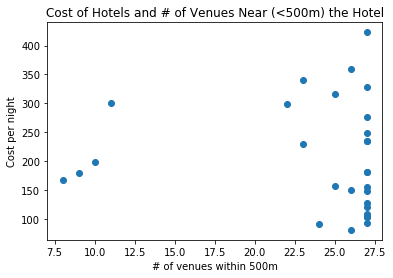

In [109]:
import scipy.stats
x = hotel_data[['Venues_within_500m']]
y = hotel_data[['Cost']]

plt.title('Cost of Hotels and # of Venues Near (<500m) the Hotel')
plt.xlabel('# of venues within 500m')
plt.ylabel('Cost per night')
plt.scatter(x, y)

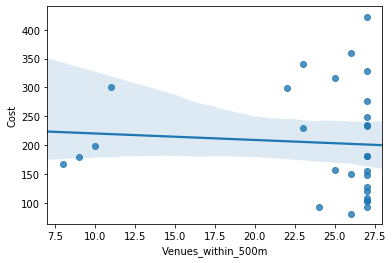

In [110]:
import seaborn as sns
sns.regplot(x="Venues_within_500m", y="Cost", data=hotel_data)

This scatter plot shows almost no correlation between cost and number of venues.

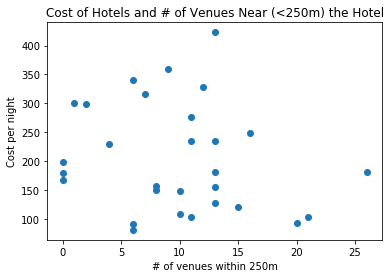

In [111]:
x = hotel_data[['Venues_within_250m']]
plt.title('Cost of Hotels and # of Venues Near (<250m) the Hotel')
plt.xlabel('# of venues within 250m')
plt.ylabel('Cost per night')
plt.scatter(x, y)

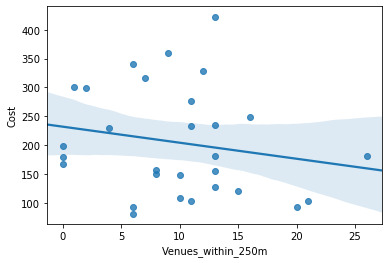

In [112]:
sns.regplot(x='Venues_within_250m', y='Cost', data=hotel_data)

This scatter plot has significantly less points clustered on the right extreme of the x-axis. A slight negative correlation can be seen between cost and number of venues, but it is still insignificant to say that nearby venues alone contribute to the cost of the hotel. 

If a tourist were to choose a hotel based on a combination of cost and nearby venues, the best choice would probably be Doubletree Guest Suites, since it has 20 nearby venues within 250 meteres, while costing only 93 USD a night. 

It is important to note that reviews of the hotel would probably be a big factor in deciding which hotel to stay at. However, in order to keep this project relatively simple in execution, it was opted out. This kind of project could also be done in any location, so long as there are changes made in which databases are used and altering the Foursquare data.